In [13]:
#Import the requisite library
import spacy
from pathlib import Path
from spacy import displacy
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import numpy as np

In [2]:
import spacy.cli
spacy.cli.download("en_core_web_sm")



✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
# Define a function to read a text file, process it with SpaCy, and return the entities
def process_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    
    return entities

# Define the paths to your text files
file_path1 = Path('data/mccall-summer_of_the_mariposas.txt')
file_path2 = Path('data/prometheus.txt')

# Process the text files and print the entities
entities1 = process_file(file_path1)
entities2 = process_file(file_path2)

print('Entities in mccall-summer_of_the_mariposas.txt:')
for entity in entities1:
    print(f'Text: {entity[0]}, Entity: {entity[1]}')
    
print('\nEntities in prometheus.txt:')
for entity in entities2:
    print(f'Text: {entity[0]}, Entity: {entity[1]}')

Entities in mccall-summer_of_the_mariposas.txt:
Text: the Rio Grande, Entity: ORG
Text: La Llorona, Entity: FAC
Text: Eagle Pass, Entity: PRODUCT
Text: the Rio Grande, Entity: ORG
Text: the Rio Grande's, Entity: ORG
Text: El Sacrificio, Entity: GPE
Text: Coahuila, Entity: GPE
Text: Mexico, Entity: GPE
Text: PROLOGUE

				EL CAZO, Entity: ORG
Text: Hazme, Entity: ORG
Text: un, Entity: ORG
Text: POT, Entity: ORG
Text: Texas, Entity: GPE
Text: summer, Entity: DATE
Text: the days, Entity: DATE
Text: American, Entity: NORP
Text: Eagle Pass, Entity: ORG
Text: billions, Entity: CARDINAL
Text: Mamá, Entity: ORG
Text: Mamá, Entity: PERSON
Text: Papá, Entity: GPE
Text: first, Entity: ORDINAL
Text: Lotería, Entity: PERSON
Text: Mamá, Entity: PERSON
Text: un, Entity: ORG
Text: Papá, Entity: GPE
Text: fifty-four, Entity: CARDINAL
Text: Lotería, Entity: GPE
Text: hago, Entity: CARDINAL
Text: Papá Papá, Entity: PERSON
Text: hago, Entity: CARDINAL
Text: Riddles, Entity: PERSON
Text: hago, Entity: CARD

In [4]:
# Define a function to read a text file and process it with SpaCy
def process_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        
    return nlp(text)

# Define the paths to your text files
file_path1 = Path('data/mccall-summer_of_the_mariposas.txt')
file_path2 = Path('data/prometheus.txt')

# Process the text files
doc1 = process_file(file_path1)
doc2 = process_file(file_path2)

# Render the named entity visualization for each document
displacy.render(doc1, style='ent', jupyter=True)
displacy.render(doc2, style='ent', jupyter=True)

C:\Users\Raquel Coelho\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


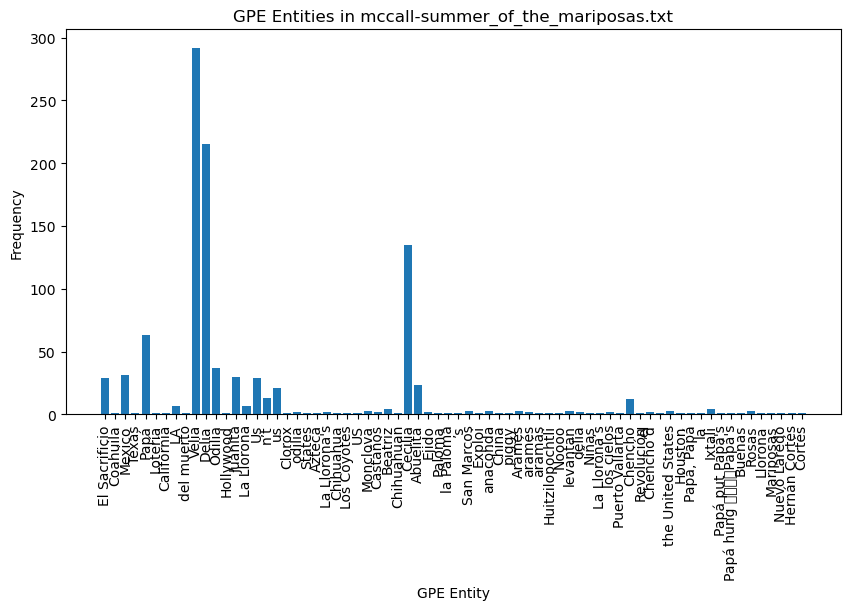

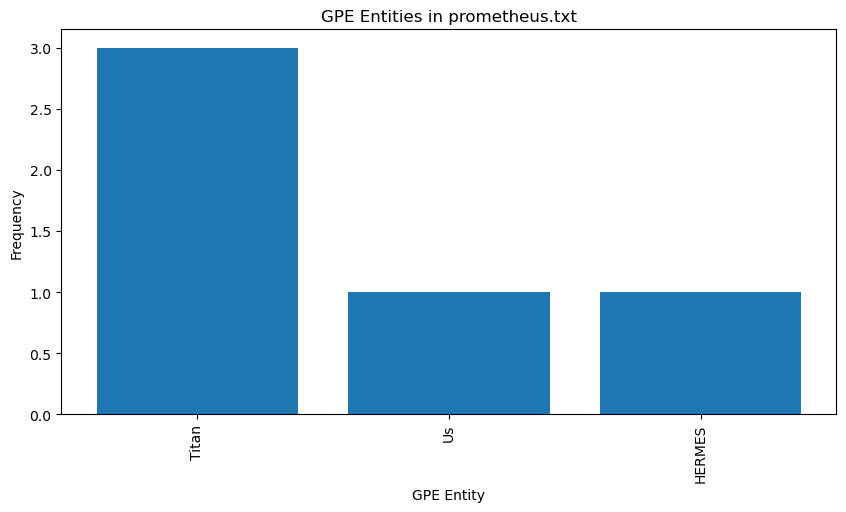

In [5]:
# Define a function to count the GPE entities in a document
def count_gpe(doc):
    # Extract GPE entities
    gpe_entities = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    
    # Count the frequency of each GPE entity
    gpe_counts = Counter(gpe_entities)
    
    return gpe_counts

# Define the paths to your text files
file_path1 = Path('data/mccall-summer_of_the_mariposas.txt')
file_path2 = Path('data/prometheus.txt')

# Process the text files and count the GPE entities
doc1 = process_file(file_path1)
doc2 = process_file(file_path2)

gpe_counts1 = count_gpe(doc1)
gpe_counts2 = count_gpe(doc2)

# Plot the GPE entity counts for each document
plt.figure(figsize=(10, 5))
plt.bar(gpe_counts1.keys(), gpe_counts1.values())
plt.title('GPE Entities in mccall-summer_of_the_mariposas.txt')
plt.xlabel('GPE Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(gpe_counts2.keys(), gpe_counts2.values())
plt.title('GPE Entities in prometheus.txt')
plt.xlabel('GPE Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

C:\Users\Raquel Coelho\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


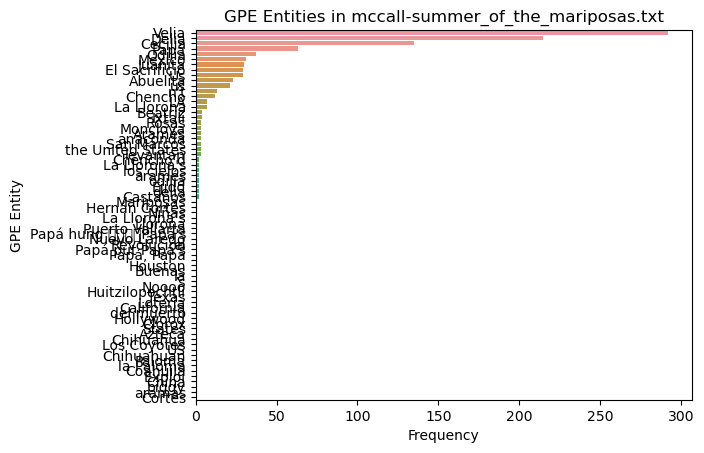

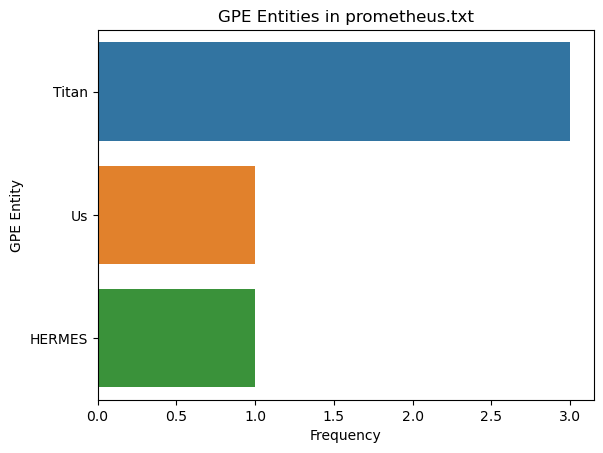

In [6]:
# Define a function to count the GPE entities in a document
def count_gpe(doc):
    # Extract GPE entities
    gpe_entities = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    
    # Convert to a pandas Series and count the frequency of each GPE entity
    gpe_counts = pd.Series(gpe_entities).value_counts()
    
    return gpe_counts

# Define the paths to your text files
file_path1 = Path('data/mccall-summer_of_the_mariposas.txt')
file_path2 = Path('data/prometheus.txt')

# Process the text files and count the GPE entities
doc1 = process_file(file_path1)
doc2 = process_file(file_path2)

gpe_counts1 = count_gpe(doc1)
gpe_counts2 = count_gpe(doc2)

# Plot the GPE entity counts for each document
sns.barplot(x=gpe_counts1.values, y=gpe_counts1.index)
plt.title('GPE Entities in mccall-summer_of_the_mariposas.txt')
plt.xlabel('Frequency')
plt.ylabel('GPE Entity')
plt.show()

sns.barplot(x=gpe_counts2, y=gpe_counts2.index)
plt.title('GPE Entities in prometheus.txt')
plt.xlabel('Frequency')
plt.ylabel('GPE Entity')
plt.show()

In [7]:
# Define a function to count the GPE entities in a document
def count_gpe(doc):
    # Extract GPE entities
    gpe_entities = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    
    # Convert to a pandas Series and count the frequency of each GPE entity
    gpe_counts = pd.Series(gpe_entities).value_counts().reset_index()
    
    return gpe_counts

# Define the paths to your text files
file_path1 = Path('data/mccall-summer_of_the_mariposas.txt')
file_path2 = Path('data/prometheus.txt')

# Process the text files and count the GPE entities
doc1 = process_file(file_path1)
doc2 = process_file(file_path2)

gpe_counts1 = count_gpe(doc1)
gpe_counts2 = count_gpe(doc2)

# Rename the columns for better understanding
gpe_counts1.columns = ['Entity', 'Frequency']
gpe_counts2.columns = ['Entity', 'Frequency']

# Define a scaling factor for the bubble sizes
scale_factor = 20

# Plot the GPE entity counts for each document using bubble chart
fig1 = px.scatter(gpe_counts1, x="Frequency", y="Entity", size=gpe_counts1["Frequency"]*scale_factor, color="Entity",
           title='GPE Entities in mccall-summer_of_the_mariposas.txt')
fig1.show()

fig2 = px.scatter(gpe_counts2, x="Frequency", y="Entity", size=gpe_counts2["Frequency"]*scale_factor, color="Entity",
           title='GPE Entities in prometheus.txt')
fig2.show()

In [8]:
# Define a function to count the GPE entities in a document
def count_gpe(doc):
    # Extract GPE entities
    gpe_entities = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    
    # Convert to a pandas Series and count the frequency of each GPE entity
    gpe_counts = pd.Series(gpe_entities).value_counts().reset_index()
    
    return gpe_counts

# Define the paths to your text files
file_path1 = Path('data/mccall-summer_of_the_mariposas.txt')
file_path2 = Path('data/prometheus.txt')

# Process the text files and count the GPE entities
doc1 = process_file(file_path1)
doc2 = process_file(file_path2)

gpe_counts1 = count_gpe(doc1)
gpe_counts2 = count_gpe(doc2)

# Define the GPE entities to filter out
filter_entities = ['Velia', 'Delia', 'Cecilia', 'Papá', 'Odilia', 'Juanita', 'Abuelita', 'us', 
                   "n't", 'Beatriz', 'levantan', 'aramés', 'Aramés', 'Rosas', 'anaconda', 'Ejido', 
                   'Virginia', 'delia', 'odilia', 'los cielos', 'Angelica', 'Diamantina', 'la', 
                   "Papá put Papá's", "Papa hung Papá's", 'Buenas', 'Mo-nyo', 'oon)/una', 'LO', 
                   'el', 'Exploi', 'del muerto', 'Paloma', "'s", 'piggy', 'aramás',
                  "n't", "Papá, Papá", 'Mo-nyo', "'s"]

# Filter out the entities
gpe_counts1 = gpe_counts1[~gpe_counts1['index'].isin(filter_entities)]
gpe_counts2 = gpe_counts2[~gpe_counts2['index'].isin(filter_entities)]

# Rename the columns for better understanding
gpe_counts1.columns = ['Entity', 'Frequency']
gpe_counts2.columns = ['Entity', 'Frequency']

# Define a scaling factor for the bubble sizes
scale_factor = 20

# Plot the GPE entity counts for each document using bubble chart
fig1 = px.scatter(gpe_counts1, x="Frequency", y="Entity", size=gpe_counts1["Frequency"]*scale_factor, color="Entity",
           title='GPE Entities in mccall-summer_of_the_mariposas.txt')
fig1.show()

fig2 = px.scatter(gpe_counts2, x="Frequency", y="Entity", size=gpe_counts2["Frequency"]*scale_factor, color="Entity",
           title='GPE Entities in prometheus.txt')
fig2.show()


In [16]:
# Define a function to count the GPE entities in a document
def count_gpe(doc):
    # Extract GPE entities
    gpe_entities = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
    
    # Get unique entities and their order of appearance
    unique_gpe_entities, order_of_appearance = [], []
    for entity in gpe_entities:
        if entity not in unique_gpe_entities:
            unique_gpe_entities.append(entity)
            order_of_appearance.append(len(unique_gpe_entities))

    # Convert to a pandas DataFrame and count the frequency of each GPE entity
    gpe_counts = pd.DataFrame({
        "Entity": unique_gpe_entities,
        "Frequency": [gpe_entities.count(ent) for ent in unique_gpe_entities],
        "Order_of_Appearance": order_of_appearance
    })
    
    return gpe_counts

# Define the paths to your text files
file_path1 = Path('data/mccall-summer_of_the_mariposas.txt')
file_path2 = Path('data/prometheus.txt')

# Process the text files and count the GPE entities
doc1 = process_file(file_path1)
doc2 = process_file(file_path2)

gpe_counts1 = count_gpe(doc1)
gpe_counts2 = count_gpe(doc2)

# Define the GPE entities to filter out
filter_entities = ['Velia', 'Delia', 'Cecilia', 'Papá', 'Odilia', 'Juanita', 'Abuelita', 
                   'us', "n't", 'Beatriz', 'levantan', 'aramés', 'Aramés', 'Rosas', 'anaconda', 
                   'Ejido', 'Virginia', 'delia', 'odilia', 'los cielos', 'Angelica', 'Diamantina', 
                   'la', "Papá put Papá's", "Papa hung Papá's", 'Buenas', 'Mo-nyo', 'oon)/una', 'LO', 
                   'el', 'Exploi', 'del muerto', 'Paloma', "'s", 'piggy', 'aramás', 'Mariposas',
                  'Us', 'PO', "n't", "'s", "La Llorona's", 'Noooo', "Chencho", "Chencho'd", "Papá, Papá"]

# Filter out the entities
gpe_counts1 = gpe_counts1[~gpe_counts1['Entity'].isin(filter_entities)]
gpe_counts2 = gpe_counts2[~gpe_counts2['Entity'].isin(filter_entities)]

# Define a scaling factor for the bubble sizes
scale_factor = 20

# Plot the GPE entity counts for each document using bubble chart
fig1 = px.scatter(gpe_counts1, x="Order_of_Appearance", y="Entity", size=gpe_counts1["Frequency"]*scale_factor, color="Entity",
           title='GPE Entities in mccall-summer_of_the_mariposas.txt')

fig1.update_layout(showlegend=False, width=800, height=800)
fig1.show()

fig2 = px.scatter(gpe_counts2, x="Order_of_Appearance", y="Entity", size=gpe_counts2["Frequency"]*scale_factor, color="Entity",
           title='GPE Entities in prometheus.txt')

fig2.update_layout(showlegend=False, width=800, height=800)
fig2.show()